In [ ]:
import math
import random
import time
import matplotlib.pyplot as plt

In [ ]:
epsilon = 0.6
sigma_inicial = 0.5

miu = 5
lmda = miu * 7
gens = 10000
start = -512
end = 512
porcentaje_mutacion = 0.8
porcentaje_recombinacion = 0.2
fitness_fun = lambda x, y: -(y + 47) * math.sin(math.sqrt(abs(x/2 + (y + 47)))) - x * math.sin(math.sqrt(abs(x - (y + 47))))

In [ ]:
def eval_fitness(population):
   list_x = list(zip(*population))[0]
   list_y = list(zip(*population))[1]

   return list(map(fitness_fun,list_x,list_y))

In [ ]:
def mutar(individual):
    t = 1 / math.sqrt(2)

    sigma = sigma_inicial * (math.e)**(t*random.gauss(0,1))

    if sigma <= epsilon:
        sigma = epsilon

    individuo_x = individual[0]
    individuo_y = individual[1]

    x_prima = individuo_x + sigma * random.gauss(0,1)
    y_prima = individuo_y + sigma * random.gauss(0,1)
    return (x_prima, y_prima)

In [ ]:
def recombinacion_discreta(tupla):
  individuos_x = list(zip(*tupla))[0]
  individuos_y = list(zip(*tupla))[1]

  result1 = random.choice(individuos_x)
  result2 = random.choice(individuos_y)

  return (result1,result2)

In [ ]:
def recombinacion_local_intermedia(tupla):
  x = list(zip(*tupla))[0]
  y = list(zip(*tupla))[1]

  dad1_x = random.choice(x)
  dad1_y = random.choice(y)

  dad2_x = random.choice(x)
  dad2_y = random.choice(y)

  valor_uniforme_x = random.uniform(0,1)
  valor_uniforme_y = random.uniform(0,1)

  first_result_x =  dad1_x * valor_uniforme_x
  first_result_y =  dad1_y * valor_uniforme_y

  second_result_x = dad2_x * (1 - valor_uniforme_x)
  second_result_y = dad2_y * (1 - valor_uniforme_y)

  result_x = first_result_x + second_result_x
  result_y = first_result_y + second_result_y

  return (result_x, result_y)

In [ ]:
def recombinacion_global_intermedia(tupla):
  lista_x = list(zip(*tupla))[0]
  lista_y = list(zip(*tupla))[1]

  individuos_x = []
  individuos_y = []

  sum_x = 0.0
  sum_y = 0.0

  for i in range(0,4):
    individuos_x.append(random.choice(lista_x))
    individuos_y.append(random.choice(lista_y))

    sum_x += individuos_x[i]
    sum_y += individuos_y[i]

  promedio_x = sum_x / 4
  promedio_y = sum_y / 4

  return (promedio_x, promedio_y)

In [ ]:
def evolution_strategies(parents):
  print("Opciones:")
  print("1 -> recombinacion global intermedia")
  print("2 -> recombinacion local intermedia")
  print("3 -> recombinacion discreta")
  opcion = int(input("Elija la opcion de la recombinacion que desea: "))

  start_time = time.time()

  best_fitness_history = {}  # Diccionario para almacenar la historia del mejor fitness
  best_fitness = float('inf')

  for i in range(gens):
    if i < gens*porcentaje_recombinacion:
      if opcion == 1:
        offsprings = [recombinacion_global_intermedia(parents) for _ in range(lmda)]
      elif opcion == 2:
        offsprings = [recombinacion_local_intermedia(parents) for _ in range(lmda)]
      elif opcion == 3:
        offsprings = [recombinacion_discreta(parents) for _ in range(lmda)]
      else:
        print("Elija una opcion valida")
    else:
      offsprings = [mutar(random.choice(parents)) for _ in range(lmda)]

    population = parents + offsprings
    fitness = eval_fitness(population)
    best = sorted(range(len(population)),key=lambda x:fitness[x])
    best_index = min(range(len(population)), key=lambda x: fitness[x])

    if fitness[best_index] < best_fitness:
        best_fitness = fitness[best_index]
        best_fitness_history[i] = best_fitness

    parents = [population[best[k]] for k in range(miu)]

  end_time = time.time()

  print("Mejor solucion: ", parents[0])
  print("Número de iteraciones: ", gens)
  print("Tiempo de ejecución: ", end_time - start_time)

  print("\n")
  plt.plot(eval_fitness(parents))
  plt.xlabel('Gen')
  plt.ylabel('Fitness')
  plt.title('Gráfica de Convergencia')
  plt.show()


Opciones:
1 -> recombinacion global intermedia
2 -> recombinacion local intermedia
3 -> recombinacion discreta
Elija la opcion de la recombinacion que desea: 1
Mejor solucion:  (276.85779053049527, 28.9128769137107)
Número de iteraciones:  10000
Tiempo de ejecución:  2.0005486011505127




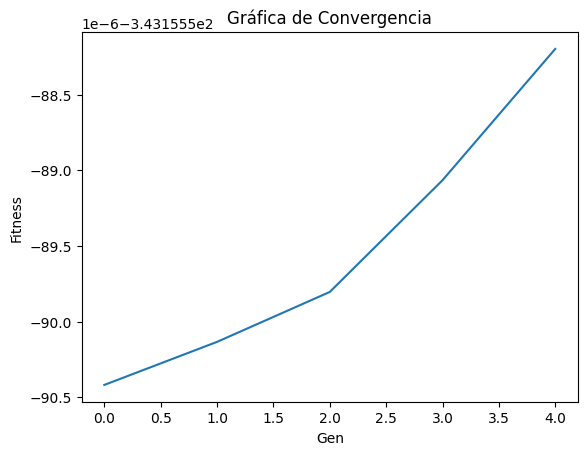

In [ ]:
random.seed(0)
parents = [(random.uniform(start, end), random.uniform(start,end)) for _ in range(miu)]

evolution_strategies(parents)